In [237]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
import ipywidgets as widgets
from IPython.display import clear_output
import time
from sklearn.utils import shuffle

In [294]:
color_pairs = np.array([
    [[34, 26, 78],[207, 92, 84]],
    [[34, 28, 102],[125, 192, 122]],
    [[6, 33, 87], [237, 90, 123]],
    [[30, 37, 102],[157, 70, 107]],
    [[35, 40, 86],[139, 101, 173]],
    
    [[34, 42, 86], [181, 230, 231]],
    [[29, 37, 104], [75, 164, 114]],
    [[37, 37, 88], [67, 137, 184]],
    [[67, 40, 101], [164, 248, 249]],
    [[28, 37, 66], [64, 139, 130]],
    
    [[66, 42, 99], [193, 205, 208]],
    [[19, 24, 138], [234, 95, 198]],
    [[46, 27, 84], [210, 245, 191]],
    [[47, 28, 82], [247, 207, 78]],
    [[91, 44, 97], [245, 213, 85]],
    
    [[151, 40, 70], [254, 239, 86]],
    [[75, 21, 21], [165, 243, 252]],
    [[86, 28, 79], [204, 160, 147]],
    [[83, 29, 80], [192, 227, 173]],
    [[39, 36, 54], [199, 85, 78]],
    
    [[233, 84, 64], [252, 232, 102]],
    [[236, 95, 131], [244, 215, 77]],
    [[42, 48, 93], [87, 186, 73]],
    [[72, 150, 116], [214, 247, 186]],
    [[35, 37, 90], [214, 247, 186]],
    
    [[141, 74, 128], [212, 247, 190]],
    [[141, 78, 127], [211, 183, 150]],
    [[140, 78, 125], [184, 229, 231]],
    [[136, 78, 126], [248, 199, 79]],
    [[186, 48, 113], [150, 228, 228]],
    
    [[224, 86, 120], [243, 210, 213]],
    [[13, 21, 23], [91, 130, 136]],
    [[63, 14, 26], [228, 253, 224]],
    [[38, 28, 51], [209, 185, 149]],
    # [[31, 8, 14], [252, 254, 253]],
    
    [[36, 25, 41], [228, 253, 223]],
    [[192, 70, 60], [237, 234, 209]],
    [[35, 97, 162], [234, 202, 218]],
    [[9, 32, 38], [145, 153, 164]],
    [[203, 85, 107], [173, 213, 213]]
])

color_pairs.shape

(39, 2, 3)

In [295]:
left_pair = np.concatenate((color_pairs[:,0,:], color_pairs[:,1,:]), axis=0)
right_pair = np.concatenate((color_pairs[:,1,:], color_pairs[:,0,:]), axis=0)

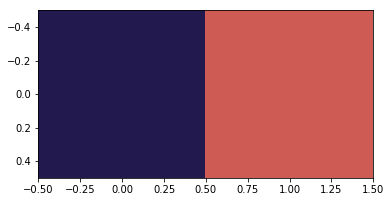

In [296]:
image = color_pairs[0].reshape(1, 2, 3) / 255
plt.imshow(image)

In [297]:
colornet = nn.Sequential(
    nn.Linear(3, 32),
    nn.ReLU(),
    nn.Linear(32, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 3),
    nn.Sigmoid()
)

print(sum(p.numel() for p in colornet.parameters() if p.requires_grad))

colornet

6595


Sequential(
  (0): Linear(in_features=3, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=3, bias=True)
  (7): Sigmoid()
)

In [299]:
epochs = 100000

optimizer = optim.Adam(colornet.parameters(), lr=0.00001)
criterion = nn.MSELoss()

for e in range(1, epochs+1):
    optimizer.zero_grad()
    
    left_pair, right_pair = shuffle(left_pair, right_pair)
    
    x = torch.from_numpy(left_pair / 255.0).float()
    y = torch.from_numpy(right_pair / 255.0).float()
        
    pred = colornet(x)
    loss = criterion(pred, y)
    
    loss.backward()
    optimizer.step()
    
    if e % 5000 == 0:
        print(f"Epoch {e} - loss {loss}")

Epoch 5000 - loss 0.0011683914344757795
Epoch 10000 - loss 0.0011577614350244403
Epoch 15000 - loss 0.0011485705617815256
Epoch 20000 - loss 0.0011385385878384113
Epoch 25000 - loss 0.0011277955491095781
Epoch 30000 - loss 0.0011182493763044477
Epoch 35000 - loss 0.0011094255605712533
Epoch 40000 - loss 0.0011009792797267437
Epoch 45000 - loss 0.0010926639661192894
Epoch 50000 - loss 0.0010849529644474387
Epoch 55000 - loss 0.0010777040151879191
Epoch 60000 - loss 0.001070614904165268
Epoch 65000 - loss 0.0010637935483828187
Epoch 70000 - loss 0.0010574471671134233
Epoch 75000 - loss 0.0010514107998460531
Epoch 80000 - loss 0.0010454695438966155
Epoch 85000 - loss 0.001039631781168282
Epoch 90000 - loss 0.001033842796459794
Epoch 95000 - loss 0.0010281221475452185
Epoch 100000 - loss 0.0010223007993772626


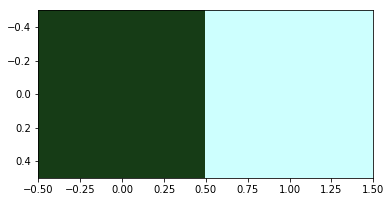

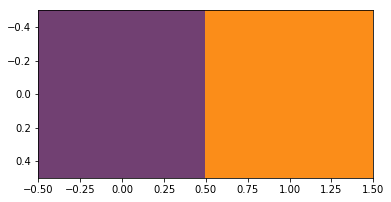

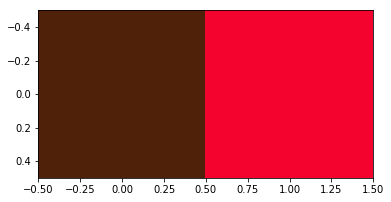

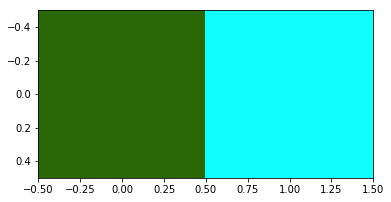

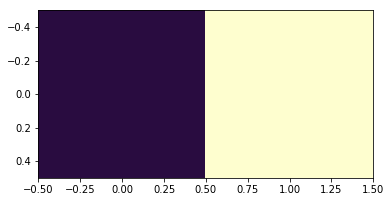

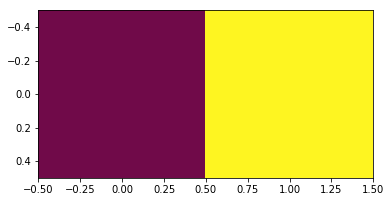

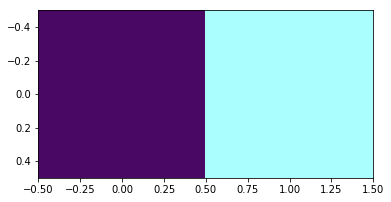

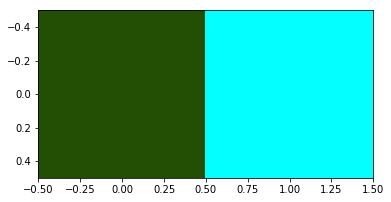

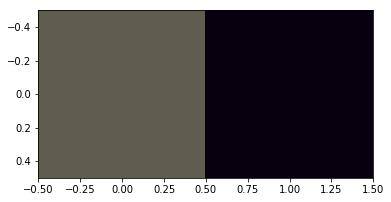

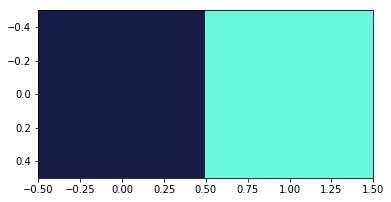

In [306]:
for i in range(10):
    test_color = np.random.randint(0, 128, (1, 3)) / 255

    with torch.no_grad():
        pred = colornet(torch.from_numpy(test_color).float()).numpy()
        duotone = np.concatenate((test_color, pred))

        image = duotone.reshape(1, 2, 3)
        plt.imshow(image)
        plt.show()

In [ ]:
torch.save(colornet.state_dict(), 'model.pt')